# ECE 457B - Assignment 2

## By: Sheen Thusoo, 20728766

### Problem 1: Support Vector Machines
We need to construct SVM classifier to classify data from Wine Dataset, our main target is to try to classify Wine's Quality based on the inputs. Please use Wine_Dataset.csv file uploaded to learn for this task. (The dataset is originally from: https://archive.ics.uci.edu/ml/datasets/wine+quality)


a. Load Wine dataset and discover its parameters, you may need to normalize data if it improves your results. Then use SVM in Sklearn library to classify Wine quality, vary the hyperparameters  as follows: Use Kernels of RBF, Linear, and Poly. Use the regularization parameter "C" as [1,10,50,100] for RBF and Poly, and [1,10,20,30] for Linear Kernel. 
Add results to a table.

In [ ]:
import pandas as pd
import numpy as np

# Load Wine Dataset
df = pd.read_csv('/content/Wine_Dataset.csv')

# Labels -> Quality attribute
Labels = np.array(df['quality'].to_list())

# Features df
Features = df.copy()
Features.drop('quality', inplace=True, axis=1)
Features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0


In [ ]:
# Normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(Features)
FeaturesStand = scaler.transform(Features)
FeaturesStand = pd.DataFrame(FeaturesStand)
FeaturesStand

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,1.0
6493,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,1.0
6494,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,1.0
6495,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,1.0


In [ ]:
# Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesStand, Labels, test_size=0.20)

print('Train Features Shape: {}'.format(X_train.shape))
print('Train Labels Shape: {}'.format(y_train.shape))
print('Test Features Shape: {}'.format(X_test.shape))
print('Test Labels Shape: {}'.format(y_test.shape))

Train Features Shape: (5197, 12)
Train Labels Shape: (5197,)
Test Features Shape: (1300, 12)
Test Labels Shape: (1300,)


In [ ]:
# Use SVM
from sklearn import svm

# RBF Kernel
C = [1,10, 50, 100]
print('*************RBF Kernel*************')
for val in C:
  svm_ = svm.SVC(C=val, kernel='rbf')
  svm_.fit(X_train, y_train)
  print('C={} ------- Accuracy: {}%'.format(val, svm_.score(X_test,y_test)*100) )

print('\n')
# Poly Kernel
print('*************Poly Kernel*************')
for val in C:
  svm_ = svm.SVC(C=val, kernel='poly')
  svm_.fit(X_train, y_train)
  print('C={} ------- Accuracy: {}%'.format(val, svm_.score(X_test,y_test)*100) )

print('\n')
# Linear Kernel
C1 = [1, 10, 20, 30]
print('*************Linear Kernel*************')
for val in C1:
  svm_ = svm.SVC(C=val, kernel='linear')
  svm_.fit(X_train, y_train)
  print('C={} ------- Accuracy: {}%'.format(val, svm_.score(X_test,y_test)*100) )

*************RBF Kernel*************
C=1 ------- Accuracy: 55.07692307692308%
C=10 ------- Accuracy: 57.230769230769226%
C=50 ------- Accuracy: 57.99999999999999%
C=100 ------- Accuracy: 58.07692307692308%


*************Poly Kernel*************
C=1 ------- Accuracy: 55.69230769230769%
C=10 ------- Accuracy: 56.6923076923077%
C=50 ------- Accuracy: 56.92307692307692%
C=100 ------- Accuracy: 56.6923076923077%


*************Linear Kernel*************
C=1 ------- Accuracy: 54.46153846153846%
C=10 ------- Accuracy: 54.61538461538461%
C=20 ------- Accuracy: 54.69230769230769%
C=30 ------- Accuracy: 54.69230769230769%


b. Explain your findings of the results from Part a.

c. Modify your best kernel model to find a better performing model by changing hyperparameters "C and Gamma" by trying at least 10 different combinations and record results in a table. Comment briefly on your findings. 
DON'T USE LIBARIES TO AUTOMATE THIS PROCESS!!

In [ ]:
# Best Kernel Model - RBF
C = [75, 100, 150, 200]
gamma = [0.01, 1, 10, 100]
kernel = 'rbf'
for val in C:
  for g in gamma:
    svm_ = svm.SVC(gamma=g, C=val, kernel=kernel)
    svm_.fit(X_train, y_train)
    print('C={}, Gamma={} ------- Accuracy: {}%'.format(val, g, svm_.score(X_test,y_test)*100) )
  
  print('\n')

C=75, Gamma=0.01 ------- Accuracy: 54.53846153846153%
C=75, Gamma=1 ------- Accuracy: 57.30769230769231%
C=75, Gamma=10 ------- Accuracy: 59.30769230769231%
C=75, Gamma=100 ------- Accuracy: 65.23076923076923%


C=100, Gamma=0.01 ------- Accuracy: 54.53846153846153%
C=100, Gamma=1 ------- Accuracy: 57.53846153846154%
C=100, Gamma=10 ------- Accuracy: 59.07692307692308%
C=100, Gamma=100 ------- Accuracy: 65.46153846153845%


C=150, Gamma=0.01 ------- Accuracy: 54.46153846153846%
C=150, Gamma=1 ------- Accuracy: 57.61538461538461%
C=150, Gamma=10 ------- Accuracy: 59.692307692307686%
C=150, Gamma=100 ------- Accuracy: 65.46153846153845%


C=200, Gamma=0.01 ------- Accuracy: 54.46153846153846%
C=200, Gamma=1 ------- Accuracy: 57.53846153846154%
C=200, Gamma=10 ------- Accuracy: 60.0%
C=200, Gamma=100 ------- Accuracy: 65.46153846153845%




### Problem 2 (Kohonen Self Organizng Map: Unsupervised Learning)

We need to design a Kohonen self organizing map (SOM), which gives as an output some shades of color mapped over 100 by 100 grid of neurones. The training input of the SOM are 24 colors (use shades of red, green, blue, with some yellow, teal and pink) which you can chose from the "RGB Color Table: Basic Colors" section of this page: http://www.rapidtables.com/web/color/RGB_Color.htm 

Using a time varying learning rate  $\alpha(k) = \alpha(0)\exp\left(- \frac{k}{T}\right) $ where $k$ is the current training epoch (starts with epoch 0), $\alpha(0) = 0.8$ , and $T$ is the total number of training epochs equal to 1000.  

Note that the epoch training involves all twenty four input samples for the 24 chosen colors to the network (hint: calibrate the color codes to values between 0 and 1, instead of being between 0 and 255). Initial weights are randomized.

The topological neighbourhood $N_{i,j}(k)$ of node (j) around the winning unit (i) is given by

$N_{i,j}(k) = \exp\left(-\frac{d_{i,j}^2}{2\sigma^2(k)}\right)$

where

$\sigma(k) = \sigma_0 \exp\left(- \frac{k}{T}\right)$

and $d_{i,j}$ is the distance between winning node i and surrounding node j. Initial value of  $\sigma_0 = 1$.


a) Generate, a figure of the original grid (randomly selected) followed by figures of the SOM grid after 20, 40, 100, 1000 epochs.

(24, 3)


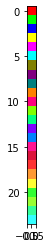

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

inputRGB = np.array([
[255,0,0],
[0,255,0],
[0,0,255],
[255,255,0],
[255,0,255],
[0,255,255],
[128,128,0],
[128,0,128],
[0,128,128],
[255,128,0],
[255,0,128],
[128,255,0],
[0,255,128],
[128,0,255],
[0,128,255],
[255,20,147],
[220,20,60],
[255,51,51],
[255,153,51],
[255,255,51],
[51,255,51],
[153,255,51],
[51,255,153],
[51,255,255]])

# Normalize the input (min-max normalize, but we already know the minimum and maximum)
normRGB = inputRGB/255

plt.imshow(np.reshape(normRGB,(normRGB.shape[0],1,3)))
print(normRGB.shape)

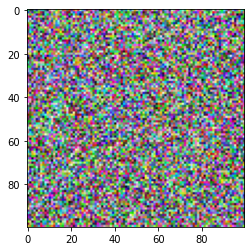

In [ ]:
from matplotlib import pyplot as plt
# Initialize the system
space_size = 100 # 100 x 100 grid of neurons

# Initialize random weights
weights = np.random.uniform(0, 1, (space_size,space_size,3))
plt.imshow(weights)

Epoch Number: 20


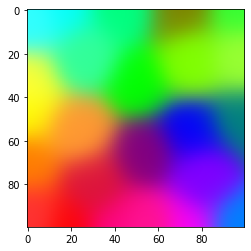

Epoch Number: 40


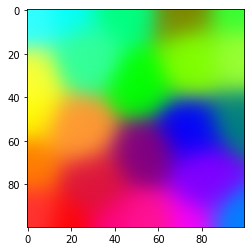

Epoch Number: 100


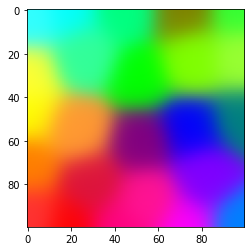

Epoch Number: 1000


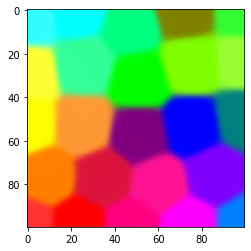

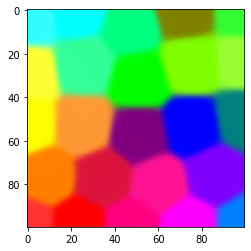

In [ ]:
from IPython import display
# Constants
alpha_0 = 0.8
alpha = alpha_0
sigma_0 = 10
sigma = sigma_0
epoch = 1
max_epochs = 1000
w = weights.copy()
rows, cols = len(w), len(w[0])
while epoch <= max_epochs:
  for x in normRGB:
    # calculate performance index
    diff = np.linalg.norm( np.subtract(x,w) , axis=2)
    # find index of winning node
    ind = np.array( np.unravel_index(np.argmin(diff, axis=None), diff.shape) )
    
    for i in range(rows):
      for j in range(cols):
        if i >= 0 and j >= 0 and i < space_size and j < space_size:
          # Calculate distance of winning node from other neurons
          neuron = np.asarray([i, j])
          d = np.linalg.norm( ind - neuron )
          
          N = np.exp(- np.square(d) / (2 * np.square(sigma) ) )
          # Update weights for neighbourhood
          w[i][j] += alpha * N *( x - w[i][j] )
    
    # Update learning rate and sigma
    sigma = sigma_0 * np.exp(- epoch / max_epochs )
    alpha = alpha_0 * np.exp(- epoch / max_epochs )
        
  plot_ind = [20, 40, 100, 1000]
  if epoch in plot_ind:
    print("Epoch Number: {}".format(epoch))
    plt.imshow(w)
    display.display(plt.gcf())
  
  epoch += 1

b) Draw your conclusions.  
Hint: There is a Matlab library and some code under this link, which you may use: http://www.cis.hut.fi/somtoolbox/

Epoch Number: 20


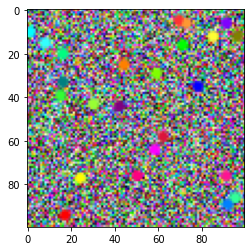

Epoch Number: 40


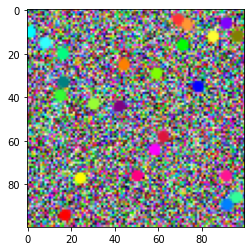

Epoch Number: 100


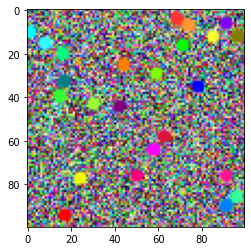

Epoch Number: 1000


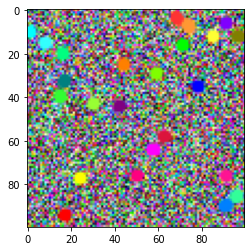

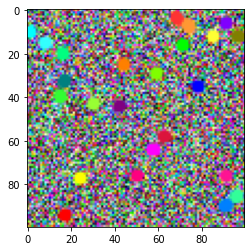

In [ ]:
from IPython import display
# Constants
alpha_0 = 0.8
alpha = alpha_0
sigma_0 = 1
sigma = sigma_0
epoch = 1
max_epochs = 1000
w = weights.copy()
rows, cols = len(w), len(w[0])
while epoch <= max_epochs:
  for x in normRGB:
    # calculate performance index
    diff = np.linalg.norm( np.subtract(x,w) , axis=2)
    # find index of winning node
    ind = np.array( np.unravel_index(np.argmin(diff, axis=None), diff.shape) )
    
    for i in range(rows):
      for j in range(cols):
        if i >= 0 and j >= 0 and i < space_size and j < space_size:
          # Calculate distance of winning node from other neurons
          neuron = np.asarray([i, j])
          d = np.linalg.norm( ind - neuron )
          
          N = np.exp(- np.square(d) / (2 * np.square(sigma) ) )
          # Update weights for neighbourhood
          w[i][j] += alpha * N *( x - w[i][j] )
    
    # Update learning rate and sigma
    sigma = sigma_0 * np.exp(- epoch / max_epochs )
    alpha = alpha_0 * np.exp(- epoch / max_epochs )
        
  plot_ind = [20, 40, 100, 1000]
  if epoch in plot_ind:
    print("Epoch Number: {}".format(epoch))
    plt.imshow(w)
    display.display(plt.gcf())
  
  epoch += 1

### Problem 3 
Using your preferred deep learning library, train a small convolutional neural network (CNN) to classify images from the CIFAR10 dataset. Note that most libraries have utility functions to download and load this dataset (TensorFlow, PyTorch). Using the API for loading the dataset will readily divide it into training and testing sets. Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem. Use the test set from the original dataset for validation. Normalize your training and testing sets using Min-Max normalization.  

1- Build a multi-layer perceptron with the following layers:   
• Dense layer with 512 units and a sigmoid activation function   
• Dense layer with 512 units and a sigmoid activation function   
• Dense layer (output layer) with 10 units (representing 10 classes in the dataset) and a suitable activation function for the classification task 
 
2- Build a Convolutional neural network with the following architecture:     
• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function  
• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function   
• Flatten layer (to pass to the Fully Connected layers)  
• Fully connected (Dense) layer with 512 units and a sigmoid activation function  
• Fully connected layer with 512 units and a sigmoid activation function 
• Dense layer (output layer) with 10 units and a suitable activation function for the classification task 
 
3- Build a Convolutional Neural network with the following architecture:  
• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function  
• 2x2 Maxpooling layer  
• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function  
• 2x2 Maxpooling layer  
• Flatten layer (to pass to the Fully Connected layers)  
• Fully connected (Dense) layer with 512 units and a sigmoid activation function  
• Dropout layer with 0.2 dropout rate  
• Fully connected layer with 512 units and a sigmoid activation function  
• Dropout layer with 0.2 dropout rate  
• Dense layer (output layer) with 10 units and a suitable activation function for the classification task  

Use a batch size of 32, utilize Adam as the optimizer and choose an appropriate loss function while monitoring the accuracy in both networks.  Train each network for 5 epochs.

In [ ]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load train & test data
train, test = datasets.cifar10.load_data()

In [ ]:
# Get indexes for 20% of train data
sample_size = len(train[0])*0.2
sampled_indexes = np.random.randint(low=0, high=49999, size=10000)

In [ ]:
# Sample training data
train_images_sampled = []
train_labels_sampled = []
for i in sampled_indexes:
  train_images_sampled.append(train[0][i])
  train_labels_sampled.append(train[1][i])

train_images_sampled = np.array(train_images_sampled)

In [ ]:
# Min-Max Normalization
train_images, test_images = train_images_sampled / 255.0, test[0] / 255.0
train_labels, test_labels = np.array(train_labels_sampled), test[1]

# To Categorical 
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

a) Report the training and testing accuracy for all three networks and comment on the performance of the MLP vs CNNs. 

In [ ]:
######## DEFINE MODELS ########

## Model 1 ##
def get_model1():
  model1 = models.Sequential()
  model1.add(Flatten(input_shape=(32, 32, 3)))
  model1.add(layers.Dense(512, activation='sigmoid', input_shape=(3072,)))
  model1.add(layers.Dense(512, activation='sigmoid'))
  model1.add(layers.Dense(10, activation='softmax'))

  model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model1

## Model 2 ##
def get_model2():
  model2 = models.Sequential()
  model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model2.add(layers.Flatten())
  model2.add(layers.Dense(512, activation='sigmoid'))
  model2.add(layers.Dense(512, activation='sigmoid'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model2

## Model 3 ##
def get_model3():
  model3 = models.Sequential()
  model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model3.add(layers.MaxPooling2D((2, 2)))
  model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model3.add(layers.MaxPooling2D((2, 2)))
  model3.add(layers.Flatten())
  model3.add(layers.Dense(512, activation='sigmoid'))
  model3.add(Dropout(0.2))
  model3.add(layers.Dense(512, activation='sigmoid'))
  model3.add(Dropout(0.2))
  model3.add(layers.Dense(10, activation='softmax'))

  model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model3

In [ ]:
from time import time

# Training and Test Accuracies
model1 = get_model1()
history1 = model1.fit(train_images, train_labels, batch_size=32, epochs=5, 
                    validation_data=(test_images, test_labels), verbose=1)
print('*************** MODEL 1 ***************')
print('Training Accuracy: {}'.format(history1.history['accuracy'][-1]))
print('Testing Accuracy: {}'.format(history1.history['val_accuracy'][-1]))

Epoch 1/5
313/313 [==============================] - 7s 20ms/step - loss: 2.0742 - accuracy: 0.2287 - val_loss: 1.9412 - val_accuracy: 0.2898
Epoch 2/5
313/313 [==============================] - 6s 19ms/step - loss: 1.9013 - accuracy: 0.3051 - val_loss: 1.9171 - val_accuracy: 0.2909
Epoch 3/5
313/313 [==============================] - 6s 19ms/step - loss: 1.8426 - accuracy: 0.3281 - val_loss: 1.8317 - val_accuracy: 0.3360
Epoch 4/5
313/313 [==============================] - 6s 19ms/step - loss: 1.7949 - accuracy: 0.3406 - val_loss: 1.8487 - val_accuracy: 0.3273
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.7450 - accuracy: 0.3695 - val_loss: 1.7524 - val_accuracy: 0.3654
*************** MODEL 1 ***************
Training Accuracy: 0.3695000112056732
Testing Accuracy: 0.3653999865055084


In [ ]:
model2 = get_model2()
start2 = time()
history2 = model2.fit(train_images, train_labels, batch_size=32, epochs=5, 
                    validation_data=(test_images, test_labels), verbose=1)
model2_training_time = time() - start2
print('*************** MODEL 2 ***************')
print('Training Accuracy: {}'.format(history2.history['accuracy'][-1]))
print('Testing Accuracy: {}'.format(history2.history['val_accuracy'][-1]))

Epoch 1/5
313/313 [==============================] - 141s 449ms/step - loss: 1.8021 - accuracy: 0.3374 - val_loss: 1.5975 - val_accuracy: 0.4275
Epoch 2/5
313/313 [==============================] - 142s 454ms/step - loss: 1.3810 - accuracy: 0.5049 - val_loss: 1.4350 - val_accuracy: 0.4753
Epoch 3/5
313/313 [==============================] - 142s 455ms/step - loss: 1.0638 - accuracy: 0.6228 - val_loss: 1.4194 - val_accuracy: 0.5099
Epoch 4/5
313/313 [==============================] - 142s 454ms/step - loss: 0.6934 - accuracy: 0.7661 - val_loss: 1.5755 - val_accuracy: 0.4944
Epoch 5/5
313/313 [==============================] - 142s 453ms/step - loss: 0.3258 - accuracy: 0.8989 - val_loss: 1.6437 - val_accuracy: 0.5137
*************** MODEL 2 ***************
Training Accuracy: 0.8988999724388123
Testing Accuracy: 0.513700008392334


In [ ]:
model3 = get_model3()
start3 = time()
history3 = model3.fit(train_images, train_labels, batch_size=32, epochs=5, 
                    validation_data=(test_images, test_labels), verbose=1)
model3_training_time = time() - start3
print('*************** MODEL 3 ***************')
print('Training Accuracy: {}'.format(history3.history['accuracy'][-1]))
print('Testing Accuracy: {}'.format(history3.history['val_accuracy'][-1]))

Epoch 1/5
313/313 [==============================] - 32s 101ms/step - loss: 2.0031 - accuracy: 0.2551 - val_loss: 1.7629 - val_accuracy: 0.3496
Epoch 2/5
313/313 [==============================] - 31s 100ms/step - loss: 1.5570 - accuracy: 0.4260 - val_loss: 1.6348 - val_accuracy: 0.4102
Epoch 3/5
313/313 [==============================] - 31s 100ms/step - loss: 1.3984 - accuracy: 0.4909 - val_loss: 1.3516 - val_accuracy: 0.5053
Epoch 4/5
313/313 [==============================] - 32s 101ms/step - loss: 1.2806 - accuracy: 0.5372 - val_loss: 1.3758 - val_accuracy: 0.5032
Epoch 5/5
313/313 [==============================] - 31s 101ms/step - loss: 1.1651 - accuracy: 0.5855 - val_loss: 1.2664 - val_accuracy: 0.5404
*************** MODEL 3 ***************
Training Accuracy: 0.5855000019073486
Testing Accuracy: 0.5404000282287598


b) Plot the training and validation curves for the two CNNs and comment on the output. How does the training time compare for each of the CNNs? How does the different architectures influence these results? What do you expect the accuracies to be if the networks were trained for more epochs? 

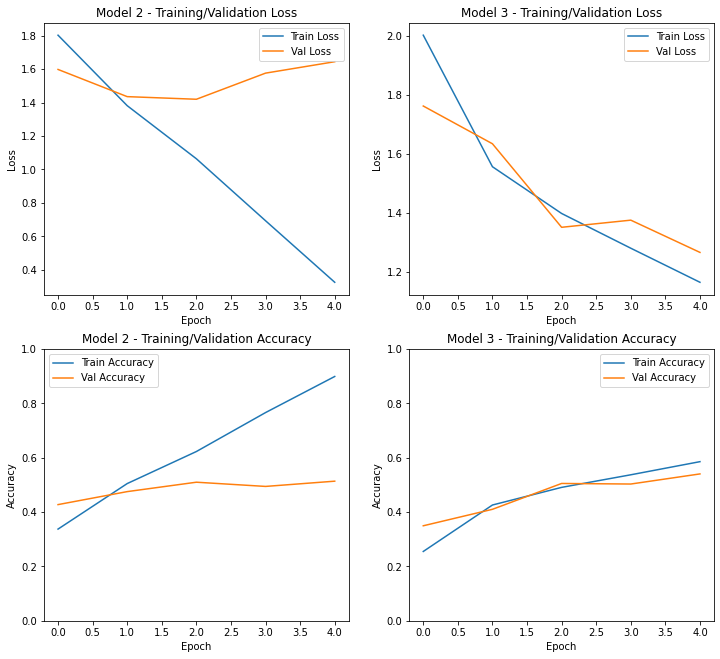

In [ ]:
# MODEL 2 & 3 - LOSS
fig, ax = plt.subplots(2, 2, figsize=(12, 11))
ax[0,0].set_title('Model 2 - Training/Validation Loss')
ax[0,0].plot(history2.history['loss'], label='Train Loss')
ax[0,0].plot(history2.history['val_loss'], label = 'Val Loss')
ax[0,0].set_xlabel('Epoch')
ax[0,0].set_ylabel('Loss')
ax[0,0].legend(loc='best')

ax[0,1].set_title('Model 3 - Training/Validation Loss')
ax[0,1].plot(history3.history['loss'], label='Train Loss')
ax[0,1].plot(history3.history['val_loss'], label = 'Val Loss')
ax[0,1].set_xlabel('Epoch')
ax[0,1].set_ylabel('Loss')
ax[0,1].legend(loc='best')

# MODEL 2 & 3 - ACCURACY
ax[1,0].set_title('Model 2 - Training/Validation Accuracy')
ax[1,0].plot(history2.history['accuracy'], label='Train Accuracy')
ax[1,0].plot(history2.history['val_accuracy'], label = 'Val Accuracy')
ax[1,0].set_xlabel('Epoch')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].set_ylim(0,1)
ax[1,0].legend(loc='best')

ax[1,1].set_title('Model 3 - Training/Validation Accuracy')
ax[1,1].plot(history3.history['accuracy'], label='Train Accuracy')
ax[1,1].plot(history3.history['val_accuracy'], label = 'Val Accuracy')
ax[1,1].set_xlabel('Epoch')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].set_ylim(0,1)
ax[1,1].legend(loc='best')

In [ ]:
# Training Time
print('Model 2 Training Time: {} seconds'.format(round(model2_training_time,3)))
print('Model 3 Training Time: {} seconds'.format(round(model3_training_time,3)))

Model 2 Training Time: 709.303 seconds
Model 3 Training Time: 202.609 seconds
